In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func_Y(X):
    # generate function of 0 and 1: Y = 0 if X0 + X1-0.75<=0 and Y=1 if x0+x1-0.75>0
    Y = Y = (X[0,:] + X[1,:] - 0.75 > 0).astype(float)
    Y = np.expand_dims(Y,axis=0)
    print("X.shape: {}".format(X.shape))
    print("Y.shape: {}".format(Y.shape))
    return Y

In [3]:
# (1) set up training data
# X is 2d array of dimension (2,m), Y is 2d array of 0 or 1 of dimension (1,m)
nfeature = 2
m = 1000
X = np.random.randn(nfeature,m)
Y = func_Y(X)

X.shape: (2, 1000)
Y.shape: (1, 1000)


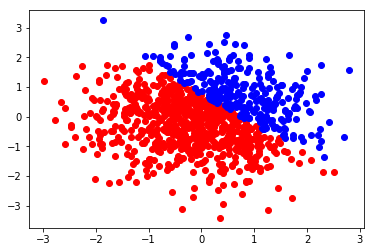

In [4]:
# (2) plot training data
# red = 0, 1 = blue
idx_0 = np.where(np.squeeze(np.absolute(Y-0))<1e-10)
idx_1 = np.where(np.squeeze(np.absolute(Y-1))<1e-10)
plt.plot(np.squeeze(X[0,idx_0]),np.squeeze(X[1,idx_0]),"ro",label="Training Data: Label=0")
plt.plot(np.squeeze(X[0,idx_1]),np.squeeze(X[1,idx_1]),"bo",label="Training Data: Label=1")

In [5]:
npoint = 3
X0=np.linspace(0,1,npoint)
X1=np.linspace(0,1,npoint)
X0grid,X1grid=np.meshgrid(X0,X1)
print("x0grid: \n{}".format(X0grid))
print("x1grid: \n{}".format(X1grid))
X0reshape=np.reshape(X0grid,(1,npoint*npoint))
X1reshape=np.reshape(X1grid,(1,npoint*npoint))
print("x0reshape: {}".format(X0reshape))
print("x1reshape: {}".format(X1reshape))

x0grid: 
[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
x1grid: 
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
x0reshape: [[0.  0.5 1.  0.  0.5 1.  0.  0.5 1. ]]
x1reshape: [[0.  0.  0.  0.5 0.5 0.5 1.  1.  1. ]]


X.shape: (2, 10000)
Y.shape: (1, 10000)


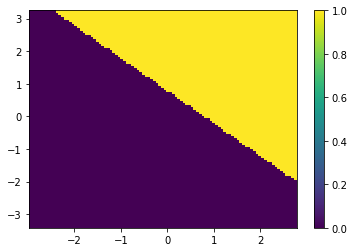

In [6]:
# (3) create heatmap
npoints = 100
# create 1d grids in x0 and x1 directions
X0lin = np.linspace(np.min(X[0,:]),np.max(X[0,:]),npoints)
X1lin = np.linspace(np.min(X[1,:]),np.max(X[1,:]),npoints)
# create 2d grads for x0 and x1 and reshape into 1d grids 
X0grid,X1grid = np.meshgrid(X0lin,X1lin)
X0reshape = np.reshape(X0grid,(1,npoints*npoints))
X1reshape = np.reshape(X1grid,(1,npoints*npoints))
# Xmatrix is a 2d grid (2,npoints*npoints)
Xmatrix = np.concatenate((X0reshape,X1reshape),axis=0)
Yout = func_Y(Xmatrix)
# reshape results into 2d grid and plot heatmap
heatmap = np.reshape(Yout,(npoints,npoints))
plt.pcolormesh(X0grid,X1grid,heatmap)
plt.colorbar()

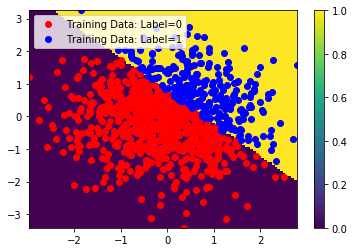

In [7]:
# (4) plot data and heatmap on same plot
plt.plot(np.squeeze(X[0,idx_0]),np.squeeze(X[1,idx_0]),"ro",label="Training Data: Label=0")
plt.plot(np.squeeze(X[0,idx_1]),np.squeeze(X[1,idx_1]),"bo",label="Training Data: Label=1")
plt.pcolormesh(X0grid,X1grid,heatmap)
plt.colorbar()
plt.legend()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])